In [128]:
import pandas as pd
from hipe4ml.model_handler import ModelHandler
import matplotlib.pyplot as plt

In [129]:
ModelHandl = ModelHandler()
ModelHandl.load_model_handler("/home/fchinu/Run3/Ds_pp_13TeV/ML/Training/pt5_6/ModelHandler_pT_5_6.pickle")

In [130]:
ModelHandl.get_training_columns()

['fCpa',
 'fCpaXY',
 'fDecayLength',
 'fDecayLengthXY',
 'fImpactParameterXY',
 'fAbsCos3PiK',
 'fImpactParameter0',
 'fImpactParameter1',
 'fImpactParameter2',
 'fNSigTpcTofPi0',
 'fNSigTpcTofKa0',
 'fNSigTpcTofPi1',
 'fNSigTpcTofKa1',
 'fNSigTpcTofPi2',
 'fNSigTpcTofKa2']

In [131]:
df_LHC22b1b = pd.read_parquet("/home/fchinu/Run3/Ds_pp_13TeV/Datasets/Ds_pp_run3_ml/MC/Train189890/LHC22b1b_PromptDs.parquet")
df_LHC23l2a = pd.read_parquet("/home/fchinu/Run3/Ds_pp_13TeV/Datasets/Ds_pp_run3_ml/MC/Train194380/LHC23l2a_PromptDs.parquet")
df_LHC24d3 = pd.read_parquet("/home/fchinu/Run3/Ds_pp_13TeV/Datasets/Ds_pp_run3_ml/MC/Train201854/LHC24d3_PromptDs.parquet")

In [132]:
len(df_LHC23l2a)

34896

In [133]:
df_LHC22b1b = df_LHC22b1b.query("5 < fPt < 5.5")
df_LHC23l2a = df_LHC23l2a.query("5 < fPt < 5.5")
df_LHC24d3 = df_LHC24d3.query("5 < fPt < 5.5")

In [134]:
len(df_LHC24d3)

1695

In [135]:
for df in [df_LHC22b1b, df_LHC23l2a, df_LHC24d3]:
    print(df["fFlagMcMatchRec"].unique(), df["fOriginMcRec"].unique())  # 4 for Ds, 1 for prompt

[ 4 -4] [1]
[ 4 -4] [1]
[ 4 -4] [1]


In [136]:
for df in [df_LHC22b1b, df_LHC23l2a, df_LHC24d3]:
    pred = ModelHandl.predict(df, False)
    df['ML_Bkg'] = pred[:,0]
    df['ML_Prompt'] = pred[:,1]
    df['ML_FD'] = pred[:,2]

    Eff = len(df.query("ML_Prompt>0.2 and ML_Bkg<0.7"))/len(df)
    print(f"len(df): {len(df)}, len(dfSel): {len(df.query('ML_Prompt>0.2 and ML_Bkg<0.7'))} Efficiency: {Eff:.3f}")

len(df): 16024, len(dfSel): 15452 Efficiency: 0.964
len(df): 2322, len(dfSel): 1944 Efficiency: 0.837
len(df): 1695, len(dfSel): 1410 Efficiency: 0.832


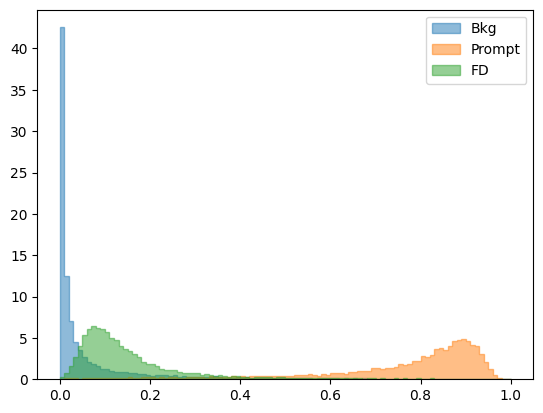

In [137]:
fig, ax = plt.subplots()
ax.hist(df_LHC22b1b["ML_Bkg"], bins=100, range=(0,1), density=True, histtype='step', label='Bkg', fill=True, alpha=0.5)
ax.hist(df_LHC22b1b["ML_Prompt"], bins=100, range=(0,1), density=True, histtype='step', label='Prompt', fill=True, alpha=0.5)
ax.hist(df_LHC22b1b["ML_FD"], bins=100, range=(0,1), density=True, histtype='step', label='FD', fill=True, alpha=0.5)
plt.legend()

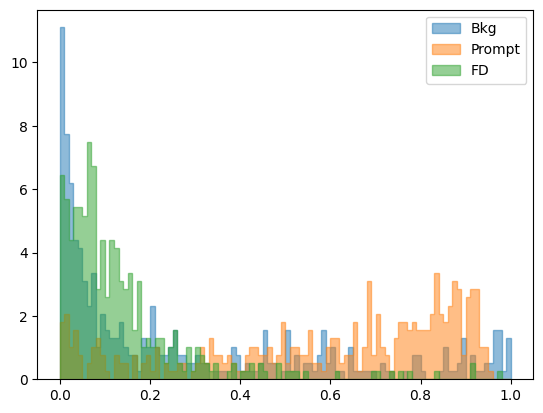

In [138]:
fig, ax = plt.subplots()
ax.hist(df_LHC23l2a["ML_Bkg"], bins=100, range=(0,1), density=True, histtype='step', label='Bkg', fill=True, alpha=0.5)
ax.hist(df_LHC23l2a["ML_Prompt"], bins=100, range=(0,1), density=True, histtype='step', label='Prompt', fill=True, alpha=0.5)
ax.hist(df_LHC23l2a["ML_FD"], bins=100, range=(0,1), density=True, histtype='step', label='FD', fill=True, alpha=0.5)
plt.legend()

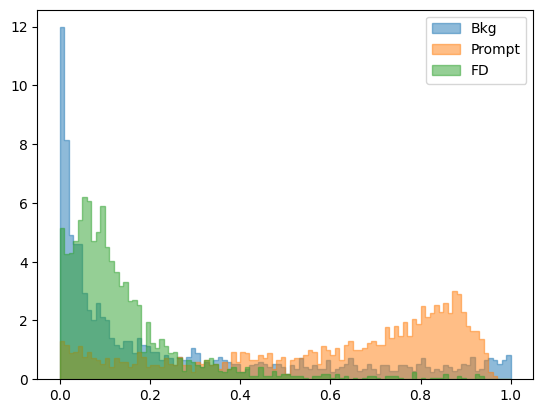

In [139]:
fig, ax = plt.subplots()
ax.hist(df_LHC24d3["ML_Bkg"], bins=100, range=(0,1), density=True, histtype='step', label='Bkg', fill=True, alpha=0.5)
ax.hist(df_LHC24d3["ML_Prompt"], bins=100, range=(0,1), density=True, histtype='step', label='Prompt', fill=True, alpha=0.5)
ax.hist(df_LHC24d3["ML_FD"], bins=100, range=(0,1), density=True, histtype='step', label='FD', fill=True, alpha=0.5)
plt.legend()

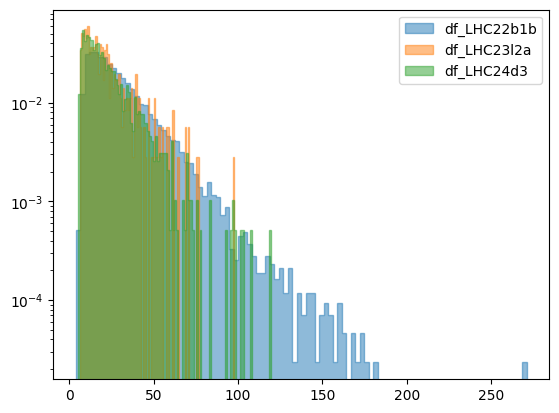

In [140]:
fig, ax = plt.subplots()
Var = 'fDecayLengthXYNormalised'
ax.hist(df_LHC22b1b[Var], bins=100, log=True, density=True, histtype='step', label='df_LHC22b1b', fill=True, alpha=0.5)
ax.hist(df_LHC23l2a[Var], bins=100, log=True, density=True, histtype='step', label='df_LHC23l2a', fill=True, alpha=0.5)
ax.hist(df_LHC24d3[Var], bins=100, log=True, density=True, histtype='step', label='df_LHC24d3', fill=True, alpha=0.5)
plt.legend()